In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#import cv2
%matplotlib inline
from scipy.stats import norm, multivariate_normal

#Ahora las funciones utiles de sklearn para preprocesar datos y armar un pipeline
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as pp

from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Las estrellas de este notebook
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier

from sklearn import datasets


# Boosting

## AdaBoost

Los dos paquetes de sklearn a utilizar son AdaBoostClassifier y AdaBoostRegressor.

Los hiperparametros especificos de AdaBoost son:

*   base_estimator: el predictor debil que utiliza. Por defecto es un DecisionStump.
*   n_estimator: Cuantos estimadores utilizar.
*   learning_rate: La tasa de aprendizaje al tomar un nuevo estimador. A menor learning_rate, se necesitan mas estimadores para fittear los datos. Es un regularizador del algoritmo.
*   algorithm: Exclusivo para clasificacion. El algoritmo de resolucion que utiliza `sklearn`. Hay dos opciones: `SAMME` y `SAMME.R`. El primero vale para todos pero es mas lento en converger. El segundo trabaja con probabilidades y por lo tanto el `base_estimator` necesita tener un `predict_proba`. Para regresion 
*   loss: Exclusivo para regresion. Es que funcion de perdida utiliza el algoritmo. Las opciones son `linear`,`square` y `exponential`.

De la clase fitteada uno puede obtener:

*   estimators_: La lista de los estimadores.
*   estimators_weights_: Los pesos de cada estimador. 1 para clasificacion, distinto de 1 para regresion.
*   estimators_errors_: El error de cada estimador al evaluarse en el conjunto de datos. No es el error al aplicar el ensemble.
*   feature_importances_: La importancia de los features.

Ademas, el AdaBoost posee el .staged_ que permite evaluar el ensemble a cada paso como si estuviese terminado.


### Ejemplo de AdaBoostClassifier con make_moons:

Apliquemos el AdaBoostClassifier al ejemplo de la clase pasada.

In [ ]:
X, y = datasets.make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

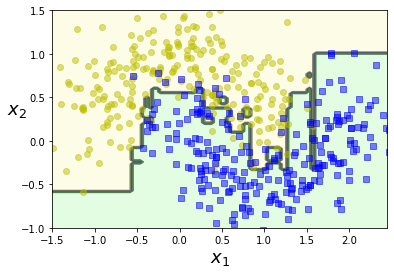

In [ ]:
n_estimators=300
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=n_estimators,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

ada_clf.fit(X_train,y_train)
plot_decision_boundary(ada_clf, X, y)

Veamos un poco los estimadores con sus pesos y su error

In [ ]:
print(np.asarray(ada_clf.estimators_).shape)

(300,)


Veamos los pesos y los errores.

(300,)


Text(0, 0.5, 'Peso')

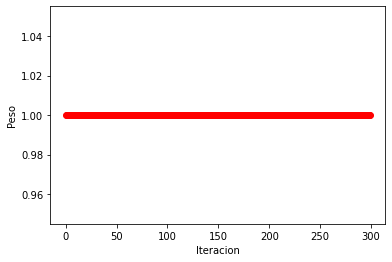

In [ ]:
print(ada_clf.estimator_weights_.shape)
plt.plot(ada_clf.estimator_weights_,'ro')
plt.xlabel('Iteracion')
plt.ylabel('Peso')

(300,)


Text(0, 0.5, 'Error')

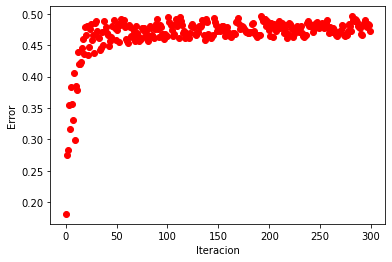

In [ ]:
print(ada_clf.estimator_errors_.shape)
plt.plot(ada_clf.estimator_errors_,'ro')
plt.xlabel('Iteracion')
plt.ylabel('Error')

En un clasificador todos los predictores pesan lo mismo.

Exploremos la evolucion en funcion del numero de estimadores

In [ ]:
for nest, est_pred in enumerate(ada_clf.staged_predict(X_train[0].reshape(1,-1))):
  print(nest, est_pred[0])

0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 1
126 1
127 1
128 1
129 1
130 1
131 1
132 1
133 1
134 1
135 1
136 1
137 1
138 1
139 1
140 1
141 1
142 1
143 1
144 1
145 1
146 1
147 1
148 1
149 1
150 1
151 1
152 1
153 1
154 1
155 1
156 1
157 1
158 1
159 1
160 1
161 1
162 1
163 1
164 1
165 1
166 1
167 1
168 1
169 1
170 1
171 1
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 1
180 1
181 1
182 1
183 1
184 1


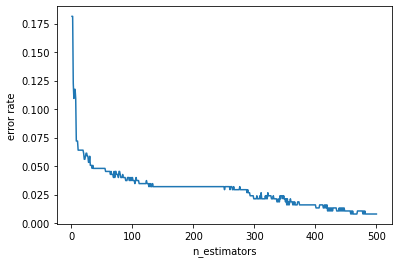

In [ ]:
from sklearn.metrics import zero_one_loss #cuenta la fraccion de mal clasificados

err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_clf.staged_predict(X_train)):
  err_train[i] = zero_one_loss(y_pred, y_train)

plt.plot(np.arange(n_estimators) + 1, err_train)

plt.xlabel('n_estimators')
plt.ylabel('error rate')
plt.show()

### Veamos el efecto del Learning rate en la convergencia:

El ejemplo lindo del Geron:

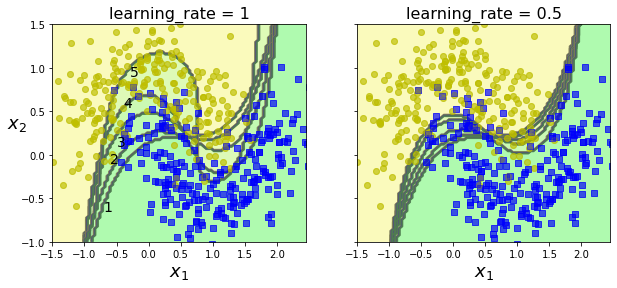

In [ ]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

Asi lo hice yo

In [ ]:
y_pred.shape

(100, 100)

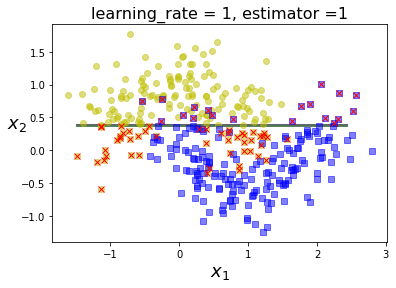

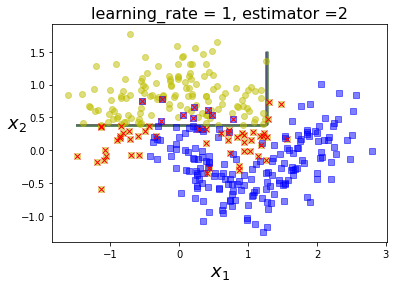

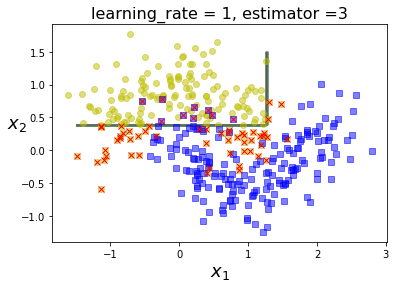

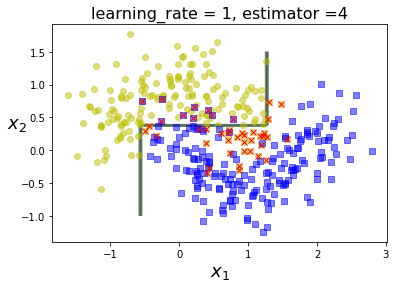

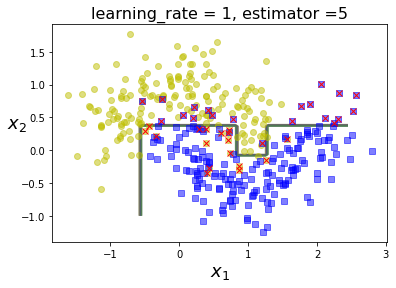

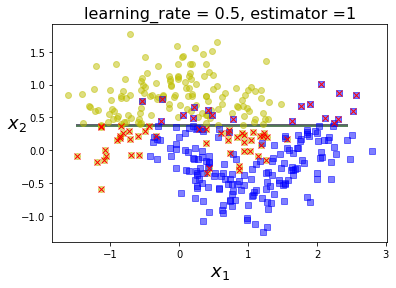

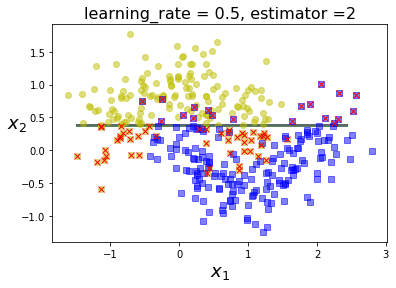

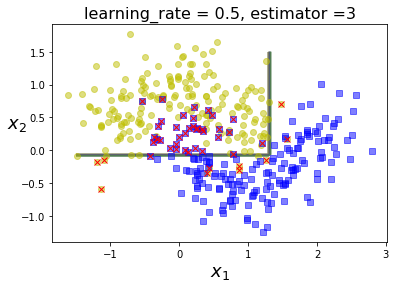

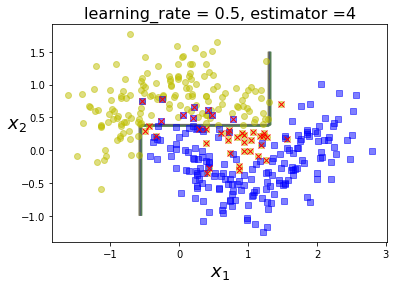

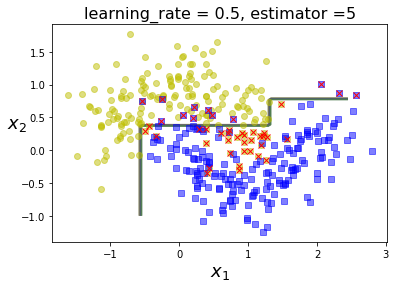

In [ ]:
m = len(X_train)

learnings = [1,0.5]
for subplot, learning_rate in enumerate(learnings):
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=5,
    algorithm="SAMME.R", learning_rate=learning_rate, random_state=42)
    ada_clf.fit(X_train,y_train)
    y_pred_train=np.zeros((5,X_train.shape[0]))
    for nest_train, est_dec_train in enumerate(ada_clf.staged_predict(X_train)):
      y_pred_train[nest_train]=est_dec_train
    #axes=[-1.5, 2.45, -1, 1.5]
    alpha=0.5
    x1s = np.linspace(-1.5, 2.45, 100)
    x2s = np.linspace(-1, 1.5, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    for nest, est_dec in enumerate(ada_clf.staged_predict(X_new)):
      y_pred = est_dec.reshape(x1.shape)
      custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
      plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yo", alpha=alpha)
      plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs", alpha=alpha)
      plt.plot(X_train[:, 0][y_pred_train[nest] != y_train], X_train[:, 1][y_pred_train[nest] != y_train], "rx", alpha=1.0)
      plt.xlabel(r"$x_1$", fontsize=18)
      plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
      plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
      plt.title("learning_rate = {}, estimator ={}".format(learning_rate,nest+1), fontsize=16)
      plt.show()

plt.show()

### Aca un ejemplo comparando algoritmos:

Otra virtud del AdaBoost es el stage_predict y stage_predict_proba, que permite ver como evoluciona el error al ir agregando iteraciones. Utilizemoslo para comparar algoritmos y ver la converfencia.

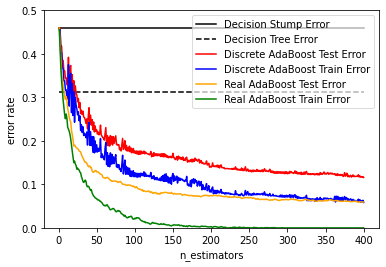

In [ ]:
n_estimators = 400
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = 1.

X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

X_test, y_test = X[2000:], y[2000:]
X_train, y_train = X[:2000], y[:2000]

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(X_train, y_train)

ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_real.fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

### Un ejemplo de AdaBoostRegressor

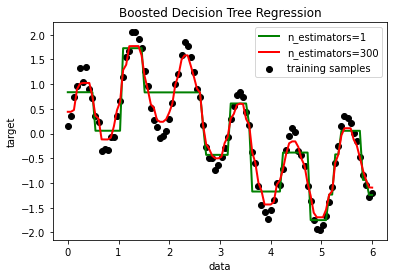

In [ ]:
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

(300,)


Text(0, 0.5, 'Peso')

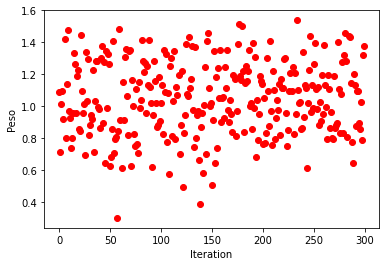

In [ ]:
print(regr_2.estimator_weights_.shape)
plt.plot(regr_2.estimator_weights_,'ro')
plt.xlabel('Iteracion')
plt.ylabel('Peso')

(300,)


Text(0, 0.5, 'Error')

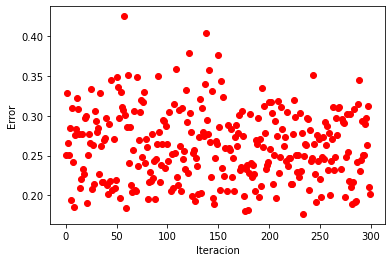

In [ ]:
print(regr_2.estimator_errors_.shape)
plt.plot(regr_2.estimator_errors_,'ro')
plt.xlabel('Iteracion')
plt.ylabel('Error')

## GradientBoosting

Antes de utilizar paquetes especificos veamos un ejemplo del Geron que muestra como funciona Gradient Boosting

### Ejemplo del Geron:

GradientBoosting busca al final hacer algo parecido a lo siguiente.

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Y la prediccion seria de esta manera:

In [ ]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

Ahora veamoslo de manera grafica

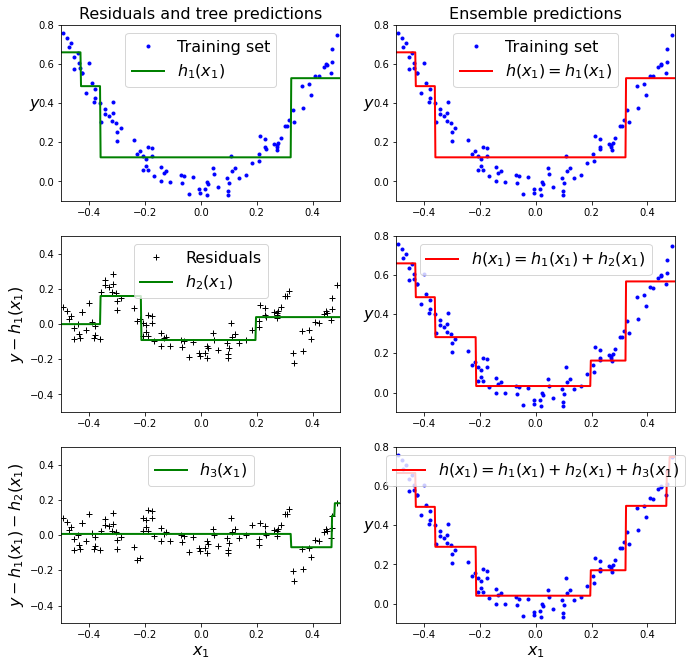

In [ ]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

### La implementacion en `sklearn`

Los dos paquetes de sklearn a utilizar son GradientBoostingClassifier y GradientBoostingRegressor. Los parametros son un poco mas largos de explicar asi que va charlado.


In [ ]:
GradientBoostingClassifier?

In [ ]:
GradientBoostingRegressor?

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

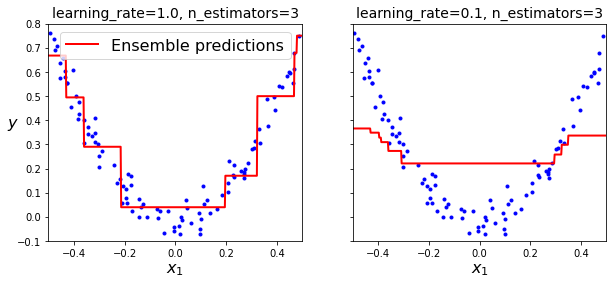

In [ ]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

### Eleccion del numero optimo de arboles

Si uno tiene demasiados estimadores, puede sobreajustar. El objetivo es entonces encontrar el numero optimo de estimadores que den un buen ajuste. Esto se puede hacer utilizando lo que se llama **early stopping**. El **early stopping** consiste en utilizar un conjunto de validacion para evaluar el predictor en funcion dle numero de estimadores. Si la metrica evaluada en el conjunto de validacion empieza a empeorar, entonces frenamos y nos quedamos con ese numero de estimadores.

In [ ]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=56,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

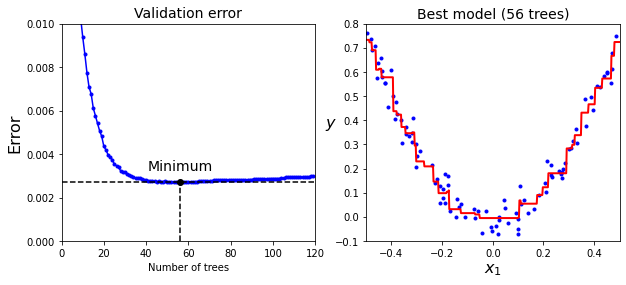

In [ ]:
min_error = np.min(errors)
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

Asi como lo hicimos mas arriba, evitamos un poco mas el sobreajuste. Sin embargo, sigo entrenando con todos los estimadores posibles, lo que es costoso. El early stopping puede incorporarse de manera tal que se detenga al momento en que vea el error de validacion comenzar a subir.

Para eso, utilizo la opcion `warm_start`. Esta opcion almacena los arboles utilizados en `.fit` y permite entrenar de manera incremental.

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [ ]:
print(gbrt.n_estimators)
print("Minimo MSE en el conjunto de validacion:", min_val_error)


61
Minimo MSE en el conjunto de validacion: 0.002712853325235463


### Stochastic gradient boosting

Hasta ahora no utilizamos el hiperparametro `subsample`.  Este hiperparametro define si entrenamos cada predictor sobre una fraccion elegida al azar de los datos. Esta tecnica baja la varianza todavia mas y acelera el entrenamiento.

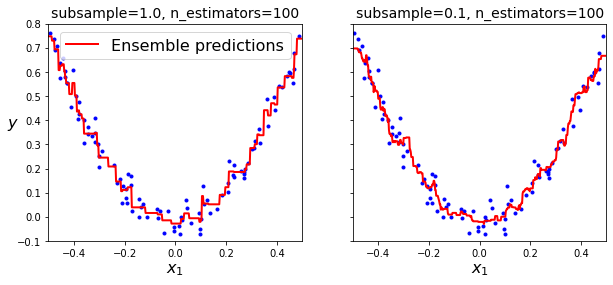

In [ ]:
gbrt_all = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.1, random_state=42)
gbrt_all.fit(X, y)

gbrt_stochastic = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.1,subsample=0.1, random_state=42)
gbrt_stochastic.fit(X, y)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt_all], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("subsample={}, n_estimators={}".format(gbrt_all.subsample, gbrt_all.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_stochastic], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("subsample={}, n_estimators={}".format(gbrt_stochastic.subsample, gbrt_stochastic.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

### XGBoost

Extreme Gradient Boosting, o `XGBoost`, es una implementacion optimizada de Gradient Boosting que busca ser rapida, escaleable y portatil. Es muy popular (como se puede ver en kaggle) y puede utilizarse de manera similiar a `sklearn` y se juntan muy bien.

In [10]:
import xgboost
from xgboost import XGBRegressor

In [14]:
XGBRegressor?

In [19]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train,test_size=0.2)

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [20]:
regressor = XGBRegressor(
    n_estimators=100,
    learning_rate=0.5,
    reg_lambda=1,
    gamma=0,
    max_depth=3)

In [21]:
regressor.fit(X_train_2, y_train_2)

[22:52:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [22]:
regressor.score(X_val,y_val)

0.8800995173919626

Podemos explorar la importancia de los features:

In [27]:
for i in range(len(boston.feature_names)):
  print((boston.feature_names[i],regressor.feature_importances_[i]))

('CRIM', 0.05081371)
('ZN', 0.014192881)
('INDUS', 0.013445458)
('CHAS', 0.02184861)
('NOX', 0.058056194)
('RM', 0.37897053)
('AGE', 0.00876108)
('DIS', 0.030425293)
('RAD', 0.015669959)
('TAX', 0.02723602)
('PTRATIO', 0.064752705)
('B', 0.011442231)
('LSTAT', 0.30438527)


Dado que esta tan optimizado y es tan rapido, probemos con `cross_val_score`.

In [24]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(regressor,X_train,y_train)
print(scores.mean(),scores.std())

[22:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.867579738543556 0.025351836695953235


# Stacking

Las clases de `sklearn` relevantes son `StackingRegressor` y `StackingClassifier`. Solo soportan una unica capa y la estrategia de entrenamiento es diferente de lo que vimos en las diapositivas. 

Por un lado, estan los `estimators` que estan entrenados sobre todos los datos `X`. Por otro, esta el `final_estimator`, el blender, entrenado con cross_val_predict de los estimators. `cv` controla esa validacion cruzada. El parametro `passthrough` altera todavia mas el algoritmo. Si se activa con `True` el blender recibe de input tanto las predicciones como los datos en si.

Veamos un ejemplo que hizo Rodrigo

In [35]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('lasso2', LassoCV(random_state=107)),
              ('svr', SVR(C=1, gamma=1e-6))]

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

reg = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))

In [37]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape)

(379, 13) (127, 13)


In [38]:
# Y se ajusta como siempre, con la magia de sklearn
reg = reg.fit(X_train, y_train)

In [39]:
reg.score(X_test, y_test)

0.8119968355647579

El Stacking tiene el metodo `transform` que da las predicciones de **todos** los predictores involucrados.

In [41]:
reg.transform(X_test[0].reshape(1,-1))

array([[28.78639577, 28.433658  , 28.433658  , 22.62294373]])

### Multilayer

`sklearn` no tiene incorporado Stacking con muchas capas. Sin embargo, Rodrigo nos dio una mano y nos lo dejo armado.

In [43]:
from sklearn.ensemble import RandomForestRegressor

final_layer = StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                                            ('gbrt', GradientBoostingRegressor(random_state=42))],
                                final_estimator=RidgeCV())

multi_layer_regressor = StackingRegressor(estimators=[('ridge', RidgeCV()),
                                                      ('lasso', LassoCV(random_state=42)),
                                                      ('svr', SVR(C=1, gamma=1e-6, kernel='rbf'))],
                                          final_estimator=final_layer)

multi_layer_regressor.fit(X_train, y_train)
print('R2 score: {:.2f}'.format(multi_layer_regressor.score(X_test, y_test)))
print(multi_layer_regressor.score(X_test, y_test))

R2 score: 0.82
0.8233965309624742
